In [1]:
from matplotlib.image import imread
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.stats as st

# Przesuwanie filtra po macierzy:

In [2]:
def OneSquare(sector,conv):
    return (sector*conv).sum()

In [133]:
def OneChannel(channel,conv,stride):
    convoluted=np.zeros(shape=np.array(channel.shape)-np.array(conv.shape)+1)
    num_cols=(channel.shape[1]-conv.shape[1]+1)//stride+1
    for i in range(0,channel.shape[1]-conv.shape[1]+1,stride):
        for j in range(channel.shape[0]-conv.shape[0]+1):
            a=channel[i:i+conv.shape[1],j:j+conv.shape[0]]
            convoluted[j][i]=OneSquare(channel[j:j+conv.shape[0],i:i+conv.shape[1]],conv)
    for i in range(convoluted.shape[1]-1,-1,-1):
        if np.any(convoluted[:,i]==np.zeros(convoluted.shape[0])):
            convoluted=np.delete(convoluted,i,axis=1)
    return convoluted

In [146]:
def Convolution(image,conv,stride=1):
    if len(image.shape)==2:
        return OneChannel(image,conv,stride)
    else:
        shape2D=np.array(image[:,:,0].shape)-np.array(conv[0].shape)+1
        convoluted=np.zeros(shape=np.append(shape2D,image.shape[2]))
        for i in range(image.shape[2]):
            convoluted[:,:,i]=OneChannel(image[:,:,i],conv[i,:,:],stride)
        return convoluted

# Przykład działania używając przesuwania

In [141]:
a=np.random.randint(0,9,(8,8))
b=np.ones((2,2))
print("A:\n",a,'\n\n',"Filtr:\n",b,'\n','\n',"Stride=3\n",Convolution(a,b,3),'\n\nStride=1\n',Convolution(a,b,1))

A:
 [[2 1 6 4 6 7 1 5]
 [1 5 1 6 6 1 8 4]
 [1 4 1 7 1 7 6 3]
 [5 3 6 6 8 3 7 7]
 [8 6 4 1 3 7 0 6]
 [6 4 8 5 4 3 2 4]
 [2 5 6 2 8 4 8 2]
 [3 1 4 2 0 3 6 3]] 

 filtr:
 [[1. 1.]
 [1. 1.]] 
 
 Stride=3
 [[ 9. 22. 18.]
 [11. 20. 21.]
 [13. 22. 23.]
 [22. 18. 20.]
 [24. 13. 12.]
 [17. 19. 16.]
 [11. 12. 19.]] 

Stride=1
 [[ 9. 13. 17. 22. 20. 17. 18.]
 [11. 11. 15. 20. 15. 22. 21.]
 [13. 14. 20. 22. 19. 23. 23.]
 [22. 19. 17. 18. 21. 17. 20.]
 [24. 22. 18. 13. 17. 12. 12.]
 [17. 23. 21. 19. 19. 17. 16.]
 [11. 16. 14. 12. 15. 21. 19.]]


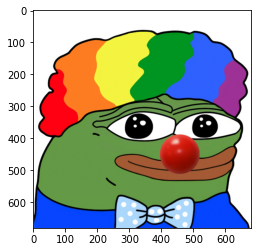

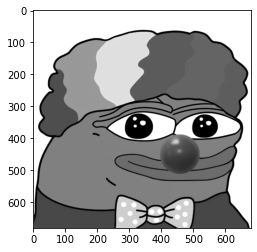

In [149]:
imgRGB = imread('fajna_zaba.jpg') 
image = Image.open('fajna_zaba.jpg').convert("L")
imgGRAY = np.asarray(image)
imgRGB = imgRGB/255
imshow(imgRGB)
plt.show()
plt.imshow(imgGRAY, cmap='gray', vmin=0, vmax=255)
plt.show()

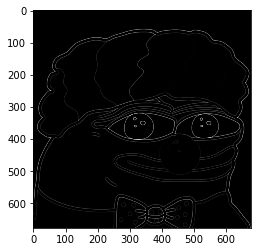

In [6]:
EdgeDetectionGray=np.array([[-1,-1,-1],
                            [-1,8,-1],
                            [-1,-1,-1]])
a=Convolution(imgGRAY,EdgeDetectionGray)
plt.imshow(a, cmap='gray', vmin=0, vmax=255)
plt.show()

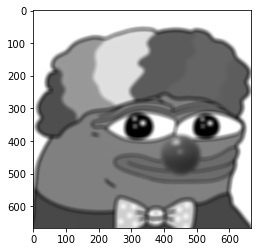

In [7]:
Blur=np.ones(shape=(15,15))/225 #Wydaje mi się, że ze względu na mały obrazek trzeba użyć większej macierzy do blura aby był widoczny efekt
a=Convolution(imgGRAY,Blur)
plt.imshow(a, cmap='gray', vmin=0, vmax=255)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


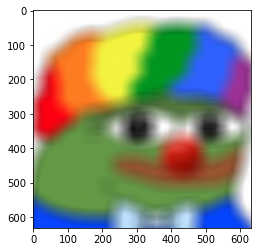

In [8]:
BlurRGB=np.array([np.ones(shape=(50,50))/2500,np.ones(shape=(50,50))/2500,np.ones(shape=(50,50))/2500])
a=Convolution(imgRGB,BlurRGB)
imshow(a)

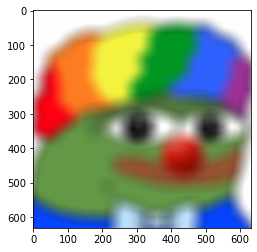

In [9]:
def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

GaussianBlurRGB=np.array([gkern(50,1),gkern(50,1),gkern(50,1)])
a=Convolution(imgRGB,GaussianBlurRGB)
imshow(a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


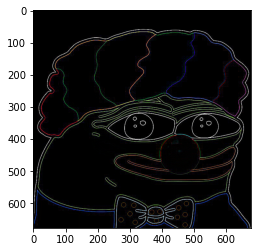

In [10]:
EdgeDetectionRGB=np.array([[[-1,-1,-1],
                            [-1,8,-1],
                            [-1,-1,-1]],
                            [[-1,-1,-1],
                            [-1,8,-1],
                            [-1,-1,-1]],
                            [[-1,-1,-1],
                            [-1,8,-1],
                            [-1,-1,-1]]
                           ])
a=Convolution(imgRGB,EdgeDetectionRGB)
imshow(a)

# Mnożenie macierzy:

In [152]:
a=np.random.randint(0,9,(5,5))
b=np.ones((2,2))
print("A:\n",a,'\n\n',"Filtr:\n",b,'\n','\n',ConvolutionMultiplication(a,b))

A:
 [[2 1 2 8 3]
 [0 4 0 2 0]
 [0 6 6 7 6]
 [4 1 6 5 0]
 [6 8 0 5 3]] 

 Filtr:
 [[1. 1.]
 [1. 1.]] 
 
 [[ 7.  7. 12. 13.]
 [10. 16. 15. 15.]
 [11. 19. 24. 18.]
 [19. 15. 16. 13.]]


In [11]:
def im2col(image, size):
    M,N = image.shape
    col_extent = N - size[1] + 1
    row_extent = M - size[0] + 1
    start_idx = np.arange(size[0])[:,None]*N + np.arange(size[1])
    offset_idx = np.arange(row_extent)[:,None]*N + np.arange(col_extent)
    return np.take (image,start_idx.ravel()[:,None] + offset_idx.ravel()[::1])

In [12]:
def ConvolutionMultiplication(image, conv):
    output_shape = (image.shape[0] - conv.shape[0]) + 1
    im2col_matrix = im2col(image, conv.shape)
    conv_flatten = np.transpose(conv.flatten()[:, np.newaxis])
    im2col_conv = np.dot(conv_flatten, im2col_matrix)
    im2col_conv = im2col_conv.reshape(output_shape,output_shape)
    return im2col_conv

# Przykład działania używając mnożenia:

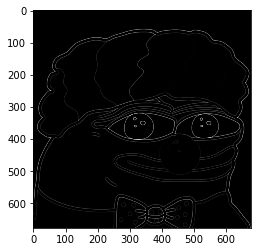

In [13]:
plt.imshow(ConvolutionMultiplication(imgGRAY,EdgeDetectionGray), cmap='gray', vmin=0, vmax=255)
plt.show()

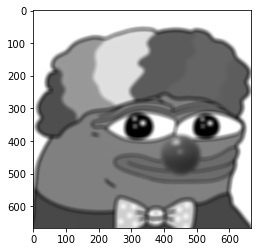

In [14]:
plt.imshow(ConvolutionMultiplication(imgGRAY,Blur), cmap='gray', vmin=0, vmax=255)
plt.show()

# Porównanie czasu:

EdgeDetection:

In [147]:
%timeit Convolution(imgGRAY,EdgeDetectionGray)
%timeit ConvolutionMultiplication(imgGRAY,EdgeDetectionGray)

3.42 s ± 32.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
57.7 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Blur:

In [148]:
%timeit Convolution(imgGRAY,Blur)
%timeit ConvolutionMultiplication(imgGRAY,Blur)

3.24 s ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.45 s ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Wnioski

Jak widać powyżej operacja konwolucji przeprowadzona za pomocą mnożenia macierzy nawet na małym obrazku 680x680 jest zauważalnie szybsza niż gdybyśmy przeprowadzali ją przesuwając macierz. Wynika to prawdopodobnie z tego, że operacje na macierzach numpy są szybsze niż pythonowy for. Z tego co udało mi się zorientować to gotowa operacja konwolucji, której się używa, jest przeprowadzana za pomocą operacji macierzowych na GPU przy użyciu wątków, co dodatkowo ją przyspiesza.